In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(measurement.date).order_by(measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date,measurement.prcp).filter(measurement.date>=year_ago).all()
date = [result[0] for result in results[:366]]
prcp = [result[1] for result in results[:366]]

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results[:366], columns=['date', 'prcp'])
#df.set_index('date', inplace=True, )
# Sort the dataframe by date
df = df.sort_values("date")
df.head()


,date,prcp
0,2016-08-23,0.00
361,2016-08-23,0.15
1,2016-08-24,0.08
362,2016-08-24,2.15
2,2016-08-25,0.08


<AxesSubplot:xlabel='date'>

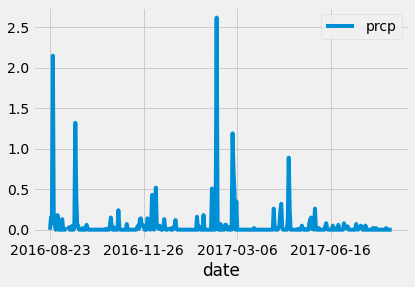

In [28]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date',y='prcp')


In [29]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df['prcp'].describe()

count    364.000000
mean       0.051319
std        0.217737
min        0.000000
25%        0.000000
50%        0.000000
75%        0.020000
max        2.620000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
session.query(station.station).count()

9

In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(measurement.station,func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station=='USC00519281').all()


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(measurement.station,measurement.date,measurement.tobs).filter(measurement.date>=year_ago).filter(measurement.station=='USC00519281').all()
active_date = [temp[1] for temp in temps[:366]]
active_tobs = [temp[2] for temp in temps[:366]]
station = [temp[0] for temp in temps[:366]]

active_df = pd.DataFrame(temps[:366], columns=['station','date', 'tobs'])
active_df.set_index('date', inplace=True, )
# Sort the dataframe by date
active_df = active_df.sort_values("date")
active_df

,station,tobs
date,,
2016-08-23,USC00519281,77.0
2016-08-24,USC00519281,77.0
2016-08-25,USC00519281,80.0
2016-08-26,USC00519281,80.0
2016-08-27,USC00519281,75.0
...,...,...
2017-08-14,USC00519281,77.0
2017-08-15,USC00519281,77.0
2017-08-16,USC00519281,76.0


<AxesSubplot:ylabel='Frequency'>

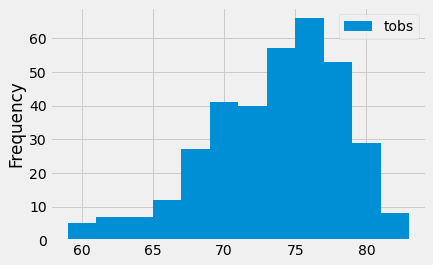

In [33]:
active_df.plot.hist(bins=12)

# Close session

In [ ]:
# Close Session
session.close()